<a href="https://colab.research.google.com/github/sitthatkaja/ThesisM.Sc./blob/main/DL_Landmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dlib

[Ref] King, D. E. (2009). Dlib-ml: A Machine Learning Toolkit. Journal of Machine Learning Research, 10, 1755-1758.

https://www.jmlr.org/papers/volume10/king09a/king09a.pdf

In [ ]:
pip install dlib opencv-python mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 11.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


In [ ]:
pip install --upgrade mediapipe

Import data

In [ ]:
import cv2
import mediapipe as mp

Google Mediapipe

Lugaresi, C., Tang, J., & Arruda, V. (2019). Mediapipe: A Framework for Building Perception Pipelines.  

จาก https://google.github.io/mediapipe/

In [ ]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

In [ ]:
cap = cv2.VideoCapture('/content/Test_image.jpg')

In [ ]:
success, image = cap.read()
if success:
    with mp_face_mesh.FaceMesh(
        static_image_mode=True,  # สำหรับการทำงานกับภาพนิ่ง
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5) as face_mesh:

        # แปลงสีจาก BGR เป็น RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # ประมวลผล landmark บนใบหน้า
        results = face_mesh.process(image)

        # แปลงกลับจาก RGB เป็น BGR เพื่อแสดงผลใน OpenCV
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # ตรวจจับและวาดจุด landmark บนใบหน้า
        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_TESSELATION,  # ใช้ attribute ที่ถูกต้อง
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1)
                )

        # แสดงผลภาพ
        cv2.imshow('MediaPipe FaceMesh', image)
        cv2.waitKey(0)  # รอจนกว่าจะกดปุ่มใด ๆ
        cv2.destroyAllWindows()

cap.release()

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


Try New

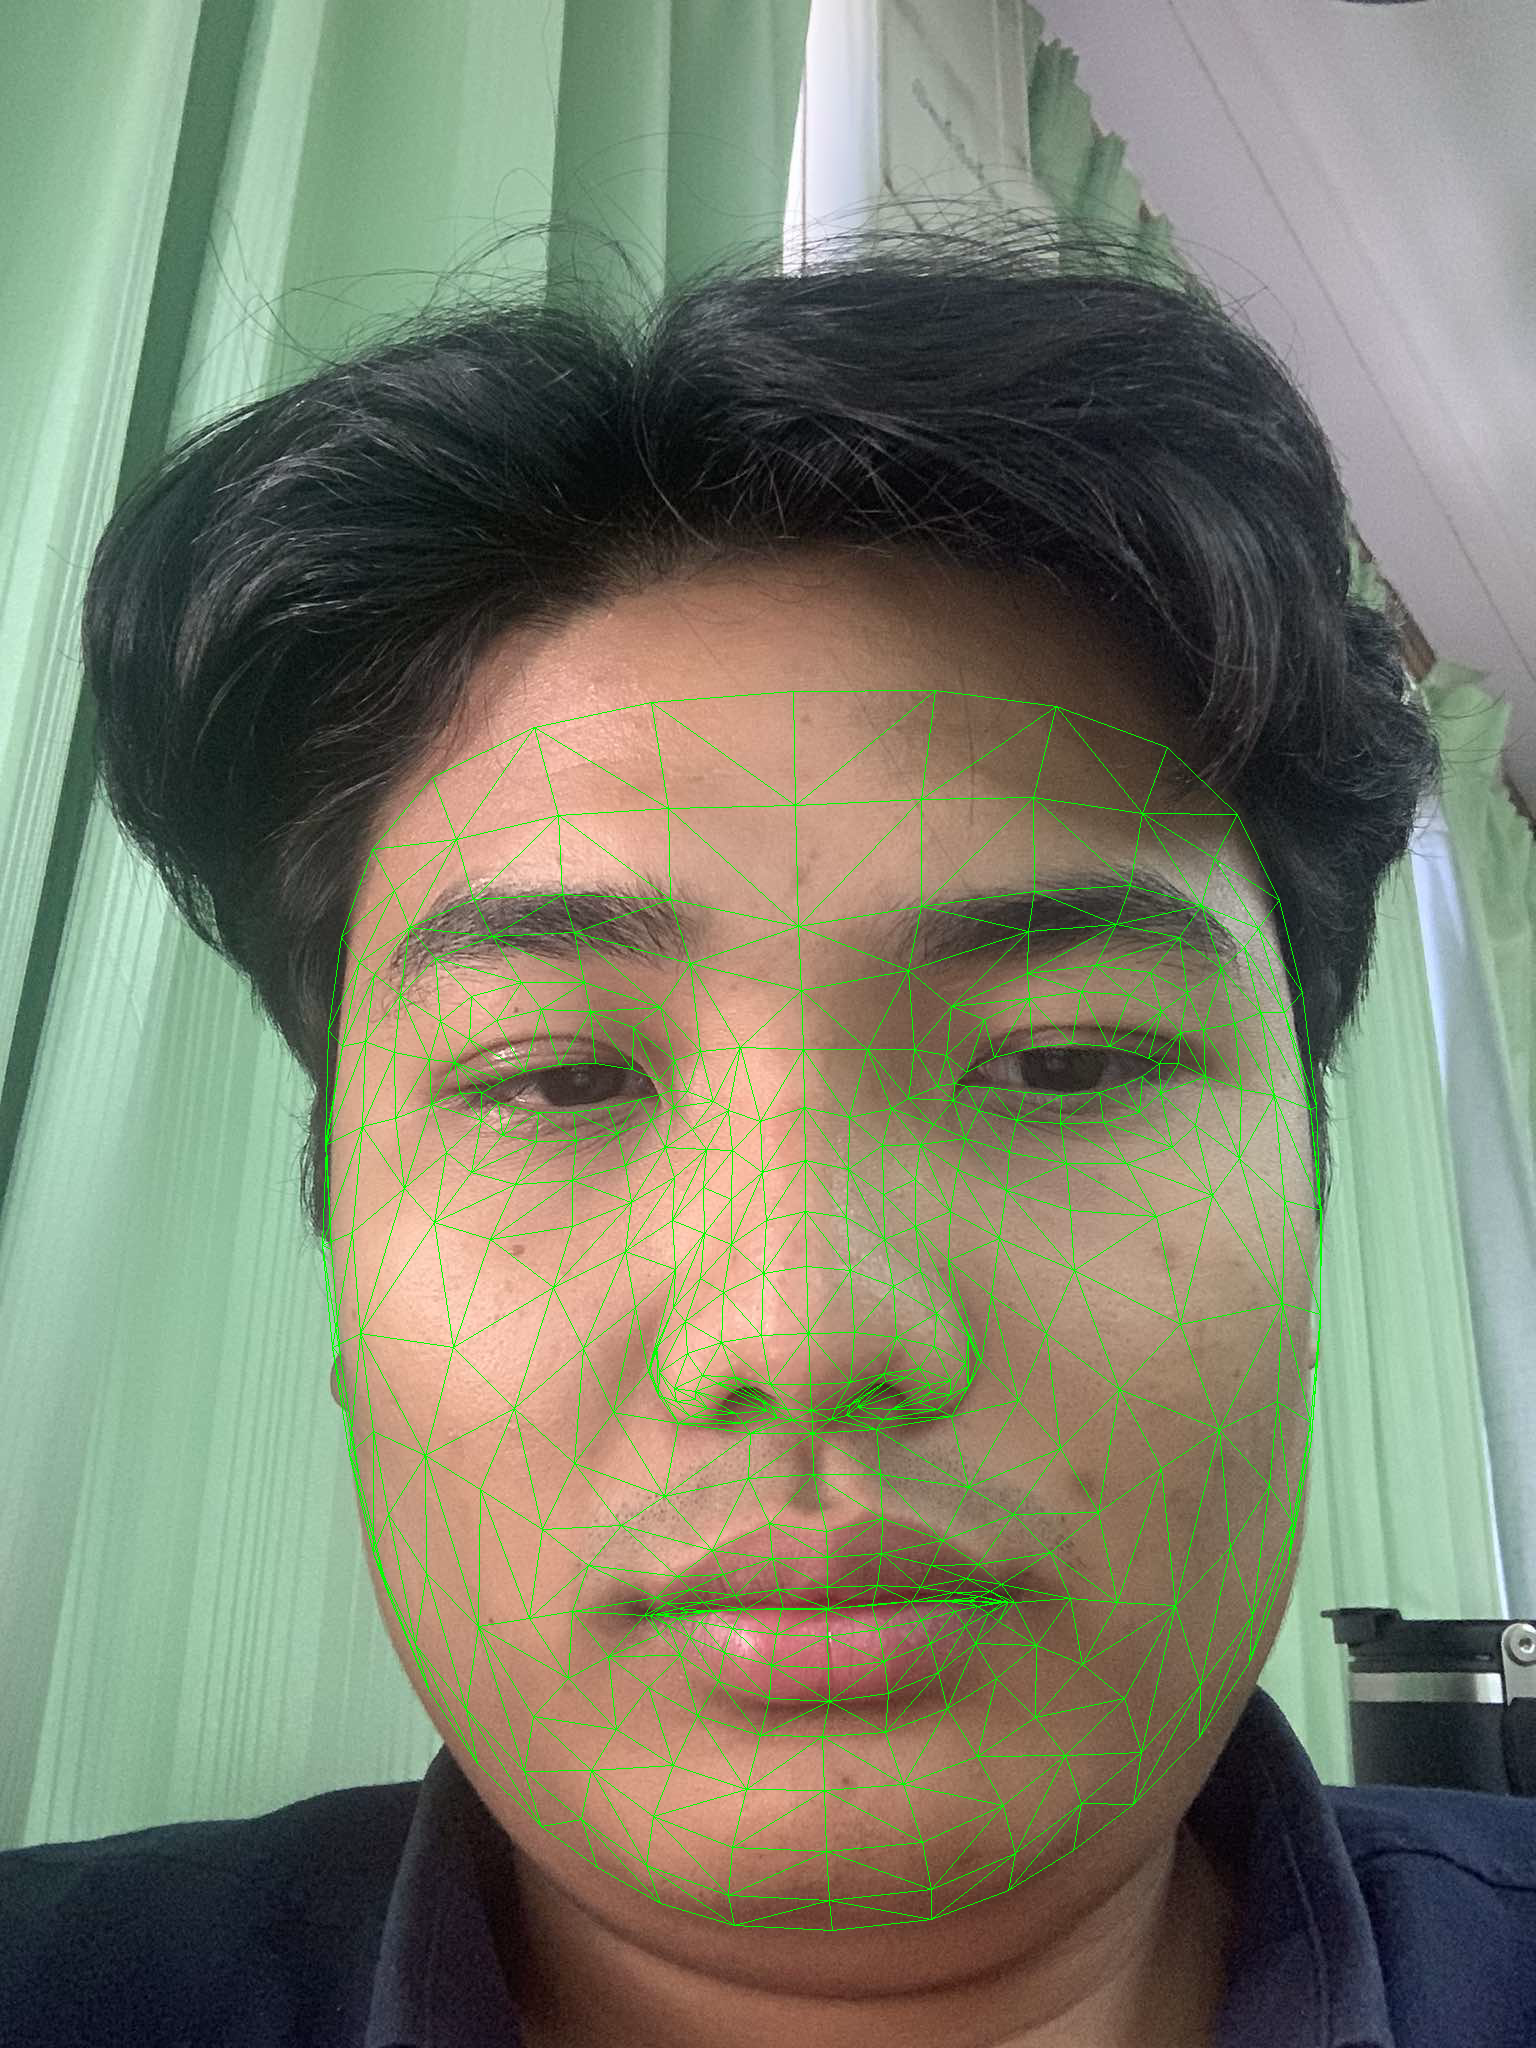

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow # Import cv2_imshow from google.colab.patches


mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

cap = cv2.VideoCapture('/content/Test_image.jpg')

success, image = cap.read()
if success:
    with mp_face_mesh.FaceMesh(
        static_image_mode=True,
        max_num_faces=1,
        refine_landmarks=True,
        min_detection_confidence=0.5) as face_mesh:

        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = face_mesh.process(image)
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        if results.multi_face_landmarks:
            for face_landmarks in results.multi_face_landmarks:
                mp_drawing.draw_landmarks(
                    image=image,
                    landmark_list=face_landmarks,
                    connections=mp_face_mesh.FACEMESH_TESSELATION,
                    landmark_drawing_spec=None,
                    connection_drawing_spec=mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=1, circle_radius=1)
                )

        # Use cv2_imshow instead of cv2.imshow
        cv2_imshow(image)

        # cv2.waitKey(0) and cv2.destroyAllWindows() are not needed with cv2_imshow
        #cv2.waitKey(0)
        #cv2.destroyAllWindows()

cap.release()

Step >> Library landmak >> import dataset >> Estimate by picture